# PIC data

In [1]:
from astropy.constants import m_e, e, k_B, m_p, eps0
from scipy.constants import pi
eps0 = eps0.value
k = k_B.value
me = m_e.value
q = e.value
mi = 40* m_p.value
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook


import json
from scipy.stats import linregress

In [2]:
plt.style.use("presentation")
with open("PIC_data.dat", "r") as f:
    pass
with open("NewPic1D.dat", "r") as f:
    data = json.load(f)

In [3]:
print(data.keys())
print(data["info"])
klist = ["0","1","2","3",'4','5']

dict_keys(['info', '0', '1', '2', '3', '4', '5'])

This is the New data for the Article: more PpC, more cells, No azimuthal electric field, etc.
Data present:
Pn : Neutral pressure
x : the mesh position, in cm
dx: the cell size, in cm
all of the physical quantities (ne, Te1, Te2, Te3, phi, Je, Ji)


In [4]:
def mean(l):
    return sum(l)/len(l)

np.log(np.sqrt(m_p*40/(2*np.pi*m_e)))

<Quantity 4.68321506>

In [5]:
print("Run disponibles")
for k in klist:
    run = data[k]
    print(k," p = ",run["Pn"], "mTorr")

Run disponibles
0  p =  0.1 mTorr
1  p =  2.0 mTorr
2  p =  10.0 mTorr
3  p =  0.5 mTorr
4  p =  0.05 mTorr
5  p =  100.0 mTorr


In [6]:
def Te_k(k):
    return (np.array(data[k]["Te2"]) + np.array(data[k]["Te1"]) + np.array(data[k]["Te3"]))/3

# Figure 1: Ne(x), Te(x) Phi(x)

In [11]:
plt.figure()
ft = 12
s = 2.5
a = 0.8
xmin = 0
xmax = 0.5

for k in ['1']:#, '1', '2']:
    Te = Te_k(k)
    phi = np.array(data[k]["phi"])
    ne = np.array(data[k]["ne"])
    ni = np.array(data[k]["ni"])
    x = np.array(data[k]["x"])
    
    plt.subplot(211)
    plt.plot(x, phi, linewidth=s,alpha = a, label ="Plasma potential $\phi$")
    plt.plot(x, Te, linewidth=s,alpha = a, label ="electron temperature $T_e$")
    plt.grid()
    plt.legend()
    plt.xlim(xmin, xmax)
    plt.subplot(212)
    plt.plot(x, ni, linewidth=s,alpha = a, label ="electron temperature $T_e$")
    plt.plot(x, ne, linewidth=s,alpha = a, label ="electron temperature $T_e$")
    plt.grid()
    plt.legend()
    plt.xlim(xmin, xmax)
    

<IPython.core.display.Javascript object>

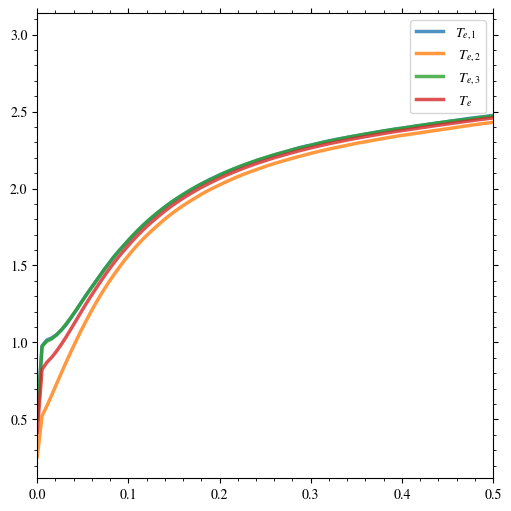

In [8]:
plt.figure()
ft = 12
s = 2.5
a = 0.8
xmin = 0
xmax = 0.5

for k in ['1', ]:
    Te = Te_k(k)
    phi = np.array(data[k]["Te1"])
    ne = np.array(data[k]["Te2"])
    ni = np.array(data[k]["Te3"])
    x = np.array(data[k]["x"])

    
    plt.plot(x, phi, linewidth=s,alpha = a, label ="$T_{e,1}$")
    plt.plot(x, ne, linewidth=s,alpha = a, label =" $T_{e,2}$")
    plt.plot(x, ni, linewidth=s,alpha = a, label =" $T_{e,3}$")
    plt.plot(x, Te, linewidth=s,alpha = a, label =" $T_e$")
    plt.grid()
    plt.legend()
    plt.xlim(xmin, xmax)
    
    

In [9]:
from scipy.ndimage import gaussian_filter1d as smooth

2.0


/home/tavant/these/code/venv/stand/lib64/python3.7/site-packages/ipykernel_launcher.py:41: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


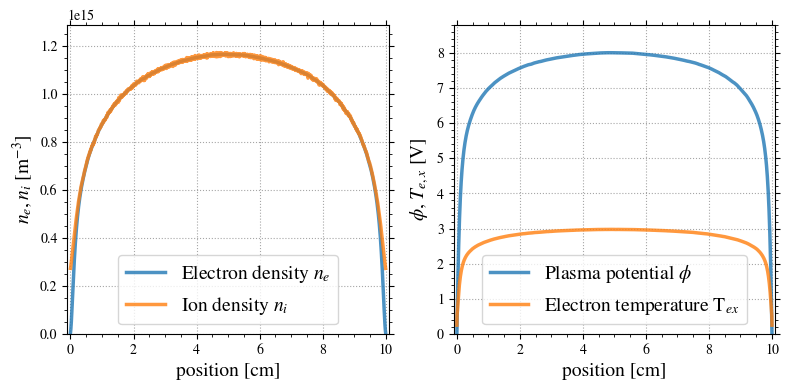

In [69]:
plt.close()
fig, [ax2, ax1] = plt.subplots(1,2, figsize=(8,4))
ft = 14
s = 2.5
a = 0.8
k = '1'
print(data[k]["Pn"])

def Te_k(k):
    return (np.array(data[k]["Te2"]) + np.array(data[k]["Te1"]) + np.array(data[k]["Te3"]))/3*2

def Te_k(k):
    return np.array(data[k]["Te2"])

Te = Te_k(k)
x = np.array(data[k]["x"])
ne = np.array(data[k]["ne"])
ni = np.array(data[k]["ni"])
phi = np.array(data[k]["phi"])

phi /= phi.max()/8


ax1.plot(x, phi, linewidth=s,alpha = a, label ="Plasma potential $\phi$")
ax1.plot(x, Te, linewidth=s,alpha = a, label ="Electron temperature T$_{ex}$")
ax1.set_ylabel("$\phi$, $T_{e,x}$ [V]", fontsize=ft)

ax2.plot(x, ne, linewidth=s,alpha = a, label = "Electron density $n_e$")
ax2.plot(x, ni, linewidth=s,alpha = a, label = "Ion density $n_i$")
# ax2.plot(x, ne.max() * np.exp( (phi - phi.max())/Te.max()), label = "$n_0 \exp(-\Delta \phi/T_e$")
ax2.set_ylabel("$n_e, n_i$ [m$^{-3}$]", fontsize=ft)
ax2.set_xlabel("position [cm]", fontsize=ft)
ax1.set_xlabel("position [cm]", fontsize=ft)
# ax1.tick_params(axis="x",labelbottom=False )
for ax in [ax1, ax2]:
    ax.grid(alpha=0.7)
    ax.margins(x=0.01, y=0.1)
    ax.legend(fontsize=ft, loc="lower center")
    ax.set_ylim(bottom = 0)
    
plt.tight_layout()


plt.savefig("./1D_PIC_summary.pdf")

In [66]:
7/2.8

2.5

2.0


/home/tavant/these/code/venv/stand/lib64/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


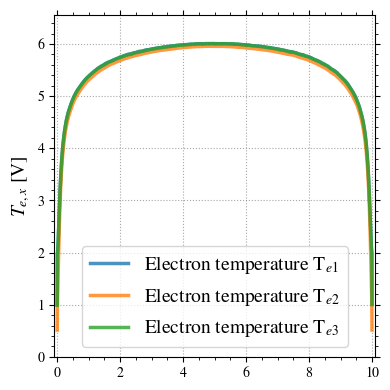

In [30]:
plt.close()
fig, ax1 = plt.subplots(1,1, figsize=(4, 4))
ft = 14
s = 2.5
a = 0.8
k = '1'
print(data[k]["Pn"])

def Te_k(k):
    return (np.array(data[k]["Te2"]) + np.array(data[k]["Te1"]) + np.array(data[k]["Te3"]))/3*2

def Te_k(k):
    return np.array(data[k]["Te2"])

Te = Te_k(k)
x = np.array(data[k]["x"])
ne = np.array(data[k]["ne"])
ni = np.array(data[k]["ni"])
phi = np.array(data[k]["phi"])

phi /= phi.max()/8


ax1.plot(x, np.array(data[k]["Te1"])*2, linewidth=s,alpha = a, label ="Electron temperature T$_{e1}$")
ax1.plot(x, np.array(data[k]["Te2"])*2, linewidth=s,alpha = a, label ="Electron temperature T$_{e2}$")
ax1.plot(x, np.array(data[k]["Te3"])*2, linewidth=s,alpha = a, label ="Electron temperature T$_{e3}$")
ax1.set_ylabel("$T_{e,x}$ [V]", fontsize=ft)

# ax1.tick_params(axis="x",labelbottom=False )
for ax in [ax1]:
    ax.grid(alpha=0.7)
    ax.margins(x=0.01, y=0.1)
    ax.legend(fontsize=ft, loc="lower center")
    ax.set_ylim(bottom = 0)
    
plt.tight_layout()


plt.savefig("./1D_PIC_anisotropy.pdf")

0.05


/home/tavant/these/code/venv/stand/lib64/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


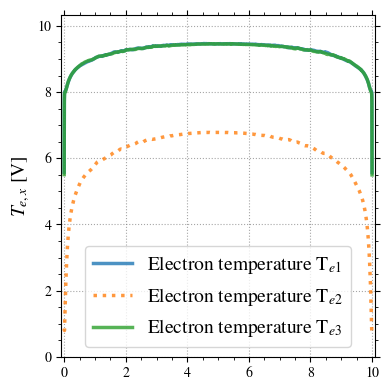

In [22]:
plt.close()
fig, ax1 = plt.subplots(1,1, figsize=(4, 4))
ft = 14
s = 2.5
a = 0.8
k = '4'
print(data[k]["Pn"])

x = np.array(data[k]["x"])
ne = np.array(data[k]["ne"])
ni = np.array(data[k]["ni"])
phi = np.array(data[k]["phi"])

phi /= phi.max()/8


ax1.plot(x, np.array(data[k]["Te1"])*2, linewidth=s,alpha = a, label ="Electron temperature T$_{e1}$")
ax1.plot(x, np.array(data[k]["Te2"])*2, ":", linewidth=s,alpha = a, label ="Electron temperature T$_{e2}$")
ax1.plot(x, np.array(data[k]["Te3"])*2, linewidth=s,alpha = a, label ="Electron temperature T$_{e3}$")
ax1.set_ylabel("$T_{e,x}$ [V]", fontsize=ft)

# ax1.tick_params(axis="x",labelbottom=False )
for ax in [ax1]:
    ax.grid(alpha=0.7)
    ax.margins(x=0.01, y=0.1)
    ax.legend(fontsize=ft, loc="lower center")
    ax.set_ylim(bottom = 0)
    
plt.tight_layout()


plt.savefig("./1D_PIC_anisotropy.pdf")

In [50]:
len(data.items())

7

/home/tavant/these/code/venv/stand/lib64/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


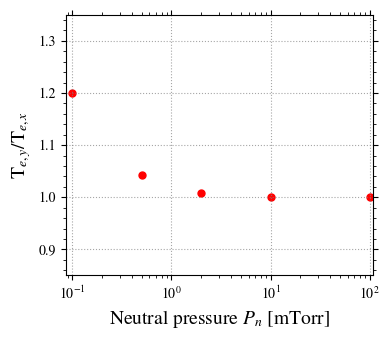

In [59]:
plt.close()
fig, ax1 = plt.subplots(1,1, figsize=(4, 3.5))
ft = 14
s = 2.5
a = 0.8

for k in ["0", "1", "2", "3", "4", "5"]:
    x = data[k]["Pn"]


    Te1 = np.array(data[k]["Te1"])*2
    Te2 = np.array(data[k]["Te2"])*2
    
    ax1.scatter(x, Te1.max()/Te2.max(), facecolor="r" )
    
    
ax1.set_ylabel("T$_{e,y}$/T$_{e,x}$ ", fontsize=ft)
ax1.set_xlabel("Neutral pressure $P_n$ [mTorr]", fontsize=ft)
ax1.set_xscale("log")
# ax1.tick_params(axis="x",labelbottom=False )
for ax in [ax1]:
    ax.grid(alpha=0.7)
    ax.margins(x=0.01, y=0.1)
    #ax.legend(fontsize=ft, loc="lower center")
    ax.set_ylim(bottom = 0.85, top=1.35)
    
plt.tight_layout()


plt.savefig("./1D_PIC_anisotropy.pdf")

# Figure 3: Polytropic fit

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


3.4003710746765137
R^2 =  0.9982103275244951 , pvalue =  0.0
2.9785265922546387
R^2 =  0.9999635559074131 , pvalue =  0.0
2.8767271041870117
R^2 =  0.9999088974466477 , pvalue =  0.0
3.1440393924713135
R^2 =  0.9997885605231143 , pvalue =  0.0
3.3925628662109375
R^2 =  0.9975938372469773 , pvalue =  0.0
0.9344412684440613
R^2 =  0.9989148294823127 , pvalue =  0.0


/home/tavant/these/code/venv/stand/lib64/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


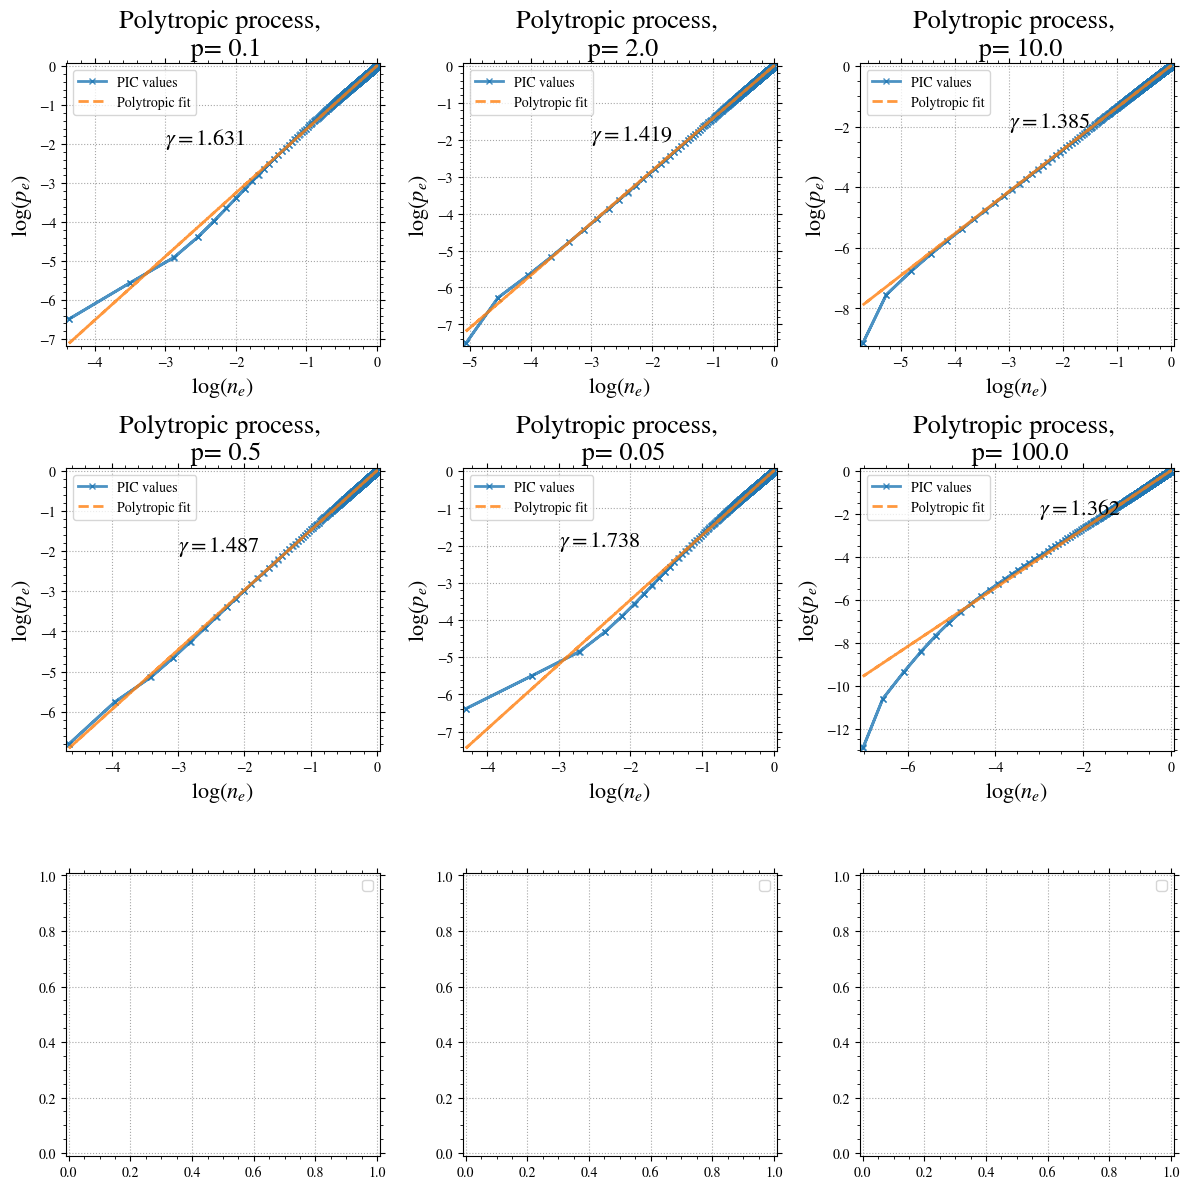

In [25]:
fig, axarr = plt.subplots(3,int(len(klist)/2), figsize=(12,12))
axarr = axarr.flatten()
for ax, k in zip(axarr, klist):
    Te = np.array(data[k]["Te2"])
    # Te = 2*( np.array(data[k]["Te2"]) + np.array(data[k]["Te1"]) + np.array(data[k]["Te3"]) )/3
    phi = np.array(data[k]["phi"])
    ne = np.array(data[k]["ne"])
    ni = np.array(data[k]["ni"])
    x = np.array(data[k]["x"])
    
    print(Te.max())
    
    ln_n = np.log(ne/ne.max())
    ln_p = np.log((ne*Te)/(ne*Te).max())
    imin, imax = 3, -3
    gamma, a, r2, p, stderr = linregress(ln_n[imin: imax], ln_p[imin: imax])
    print("R^2 = ",r2**2,", pvalue = ", p)

    p = data[k]["Pn"]

    ax.plot(ln_n, ln_p, "x-",alpha=0.8, label ="PIC values")
    ax.plot(ln_n, a + gamma*ln_n, "--",alpha=0.8, label ="Polytropic fit")
    ax.set_ylabel("log($p_e$)", fontsize=16)
    ax.set_xlabel("log($n_e$)", fontsize=16)
    ax.set_title("Polytropic process, \n p= "+str(p), fontsize=19)

    ax.annotate(xy=(-3,-2), s=f"$\gamma = {round(gamma,3)}$", fontsize=16)
for ax in axarr:
    ax.grid(alpha=0.7)
    ax.margins(0.01)
    ax.legend(fontsize=10)
    
plt.tight_layout()

## Figure PolyFit

In [32]:
def mean(l):
    return sum(l)/len(l)

k = '1'

run = data[k]
print("dx = ", run["dx"]*10)

Te = Te_k(k)

Lde = np.sqrt(eps0 * mean(Te)/( mean(run["ne"])*q   ))
print("Lde =", Lde*1000)
Ls = 3*Lde
isheath = int(Ls*100/run["dx"])
print(isheath)

dx =  0.0526316
Lde = 0.3921139820003304
22


In [38]:
Te = np.array(data[k]["Te2"])
# Te = Te_k(k)

phi = np.array(data[k]["phi"])
ne = np.array(data[k]["ne"])
ni = np.array(data[k]["ni"])
x = np.array(data[k]["x"])
ln_n = np.log(ne/ne.max())
ln_p = np.log((ne*Te)/(ne*Te).max())
gamma, a = np.polyfit(ln_n[:2*isheath], ln_p[:2*isheath], 1)
# gamma = 1.25
print(gamma)

1.4306692529268357


/home/tavant/these/code/venv/stand/lib64/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  from ipykernel import kernelapp as app


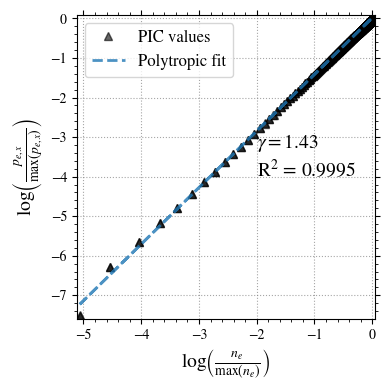

In [37]:
fig, ax1 = plt.subplots(1,1, figsize=(4,4))

ax1.plot(ln_n, ln_p, "^k",alpha=0.6, label ="PIC values", markersize=6)
ax1.plot(ln_n, a + gamma*ln_n, "--",alpha=0.8, label ="Polytropic fit")
ax1.set_ylabel("log$\\left(\\frac{p_{e,x}}{{\\rm max}(p_{e,x})}\\right)$", fontsize=14)
ax1.set_xlabel("log$\\left(\\frac{n_e}{{\\rm max}(n_e)}\\right)$", fontsize=14)

ax1.annotate(xy=(-2,-4), s="$\gamma = $"+str(round(gamma,2))+"\nR$^2$ = "+str(round(r2, 4)), fontsize=14)

for ax in [ax1]:
    ax.grid(alpha=0.7)
    ax.margins(0.01)
    ax.legend(fontsize=12)
    
plt.tight_layout()

#plt.savefig("../figures/Polytropic.pdf")

# Figure 4: Model results

In [8]:
coef1 = (gamma - 1)/gamma

def Tepoly(phi, isheath):
    return Te[isheath] + coef1 * (phi - phi[isheath])

def phi_iso(ne, isheath):
    phi0 = phi[isheath]
    ne0 = ne[isheath]
    Te0 = Te[isheath]
    
    return phi0 + np.log(ne/ne0 )*Te0

def phi_poly(ne, isheath):
    phi0 = phi[isheath]
    Te0 = Te[isheath]
    ne0 = ne[isheath]
    return phi0 + ((ne/ne0 )**(gamma-1) -1)*Te0/coef1

NameError: name 'gamma' is not defined

In [19]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4))
s = 3.

alphaPIC = 0.5
fslegend = 12
fslabels = 15
isheath = 200

ax1.plot(x[:isheath], Tepoly(phi, isheath)[:isheath], "-",alpha=1,linewidth=s,  label ="Polytropic model")
ax1.plot(x[:isheath], Te[:isheath], "^k",alpha=alphaPIC, linewidth=s, label ="PIC values", markerfacecolor="none")
ax1.set_ylabel("$T_e$ [V]", fontsize=fslabels)


ax2.plot(x[:isheath], phi_poly(ne, isheath)[:isheath], linewidth=s, label = "$\gamma = $"+str(round(gamma,2))+"")
ax2.plot(x[:isheath], phi_iso(ne, isheath)[:isheath], linewidth=s, label = "$\gamma = 1$ (isothermal)")
ax2.plot(x[:isheath], phi[:isheath], '^k', alpha=alphaPIC, label = "PIC values", markerfacecolor="none")
ax2.set_ylabel("$\phi$ [V]", fontsize=fslabels)

    
for ax in [ax2, ax1]:
    ax.grid(alpha=0.7)
    ax.margins(0.01)
    ax.legend(fontsize=fslegend)    
    ax.set_xlabel("x [cm]", fontsize=fslabels)
    ax.set_xlim((0., x[isheath]))
    ax.set_ylim(bottom = 0) 

    
plt.tight_layout()

plt.savefig("../figures/sheathModel.pdf")
x[1]-x[0]



<IPython.core.display.Javascript object>

0.00526316

In [9]:
klist = [str(i) for i in range(5)]
pns = np.zeros(len(klist))
gs = np.zeros(len(klist))

for i, k in enumerate(klist):
    Te = np.array(data[k]["Te2"])
    ne = np.array(data[k]["ne"])
        
    ln_n = np.log(ne/ne.max())
    ln_p = np.log((ne*Te)/(ne*Te).max())
    imin, imax = 0, -1
    gamma, a, r2, p, stderr = linregress(ln_n, ln_p)
    gs[i] = gamma
    pns[i] = data[k]["Pn"]


In [10]:
print(gs)
print(pns)

[1.60774597 1.42276904 1.41329905 1.48180213 1.6843951 ]
[ 0.1   2.   10.    0.5   0.05]


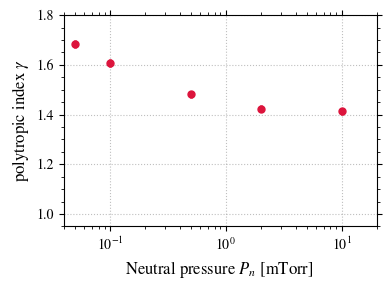

In [18]:
plt.figure(figsize=(4,3))
plt.errorbar(pns, gs, yerr=gs*0.01, xerr=0, fmt="o", color="crimson")
plt.grid()
#plt.hlines([1,], -10,1000)
#plt.text(1, 1.05,"$\gamma=1$", fontsize=13)
#plt.text(0.5, 1.6,"$\gamma = \\frac{5}{3}$", fontsize=12)
plt.xlim(left = pns.min()*0.8, right=pns.max()*2)
plt.ylim(bottom=0.95, top=1.8)
plt.xscale("log")
plt.xlabel("Neutral pressure $P_n$ [mTorr] ", fontsize=12)
plt.ylabel("polytropic index $\gamma$ ", fontsize=12)
plt.tight_layout()
plt.grid()
plt.savefig("../figure/pressur_effectLog.pdf")


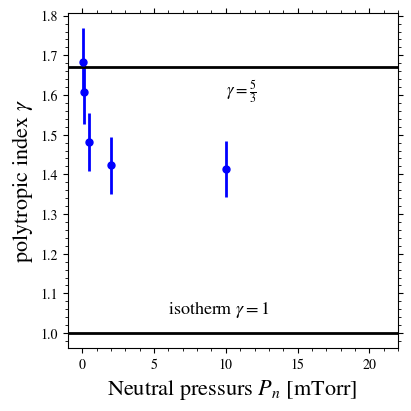

In [14]:
plt.figure(figsize=(4,4))
plt.errorbar(pns, gs, yerr=gs*0.05, xerr=0, fmt="o", color="b")
plt.grid()
plt.hlines([1, 1.67], -10,50)
plt.text(6, 1.05,"isotherm $\gamma=1$", fontsize=13)
plt.text(10, 1.6,"$\gamma = \\frac{5}{3}$", fontsize=12)
plt.xlim(left=-1,right=22)
plt.xlabel("Neutral pressurs $P_n$ [mTorr] ")
plt.ylabel("polytropic index $\gamma$ ")
plt.savefig("../figure/pressur_effect.pdf")


In [24]:
for k in klist:
    run = data[k]
    print("dx = ", run["dx"]*10)
    print("Te = ",  mean(run["Te2"]) )
    Lde = np.sqrt(eps0 * mean(run["Te2"])/( mean(run["ne"])*q   ))
    print("Lde =", Lde*1000)
    Vth = np.sqrt(q*mean(run["Te2"])/me)
    print("Vth = ", Vth)
    print("dx/vth", run["dx"]/100/Vth)
    wpe = np.sqrt(mean(run["ne"])*q**2/(me * eps0))
    print("2pi/wpe", 2*np.pi/wpe)    

dx =  0.0526316
Te =  3.1192781635330324
Lde = 0.4166290537023178
Vth =  740692.1690693616
dx/vth 7.105731935323235e-11
2pi/wpe 3.5342044348269593e-09
dx =  0.0526316
Te =  2.7624479557482085
Lde = 0.3921139820003304
Vth =  697040.0834047281
dx/vth 7.550727892565123e-11
2pi/wpe 3.5345525588858045e-09
dx =  0.0526316
Te =  2.6146504423340517
Lde = 0.38134934357726946
Vth =  678137.1212887022
dx/vth 7.761203206216053e-11
2pi/wpe 3.5333393752488535e-09
dx =  0.0526316
Te =  2.927518412055372
Lde = 0.40371388132217495
Vth =  717563.7952535567
dx/vth 7.33476247661049e-11
2pi/wpe 3.5350294206685868e-09
dx =  0.0526316
Te =  3.082366977112347
Lde = 0.41413156975814375
Vth =  736296.7309064427
dx/vth 7.148150710272216e-11
2pi/wpe 3.5339901497867944e-09
